In [31]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split as tts

In [21]:
df = data('bioChemists')
df.head(5)

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26


In [22]:
dummy = pd.get_dummies(df['fem'])
df = pd.concat([df,dummy],axis = 1)

In [23]:
df.head(5)

,art,fem,mar,kid5,phd,ment,Men,Women
1,0,Men,Married,0,2.52,7,1,0
2,0,Women,Single,0,2.05,6,0,1
3,0,Women,Single,0,3.75,6,0,1
4,0,Men,Married,1,1.18,3,1,0
5,0,Women,Single,0,3.75,26,0,1


In [24]:
dummy = pd.get_dummies(df['mar'])
df = pd.concat([df,dummy],axis = 1)

In [25]:
df.head(5)

,art,fem,mar,kid5,phd,ment,Men,Women,Married,Single
1,0,Men,Married,0,2.52,7,1,0,1,0
2,0,Women,Single,0,2.05,6,0,1,0,1
3,0,Women,Single,0,3.75,6,0,1,0,1
4,0,Men,Married,1,1.18,3,1,0,1,0
5,0,Women,Single,0,3.75,26,0,1,0,1


In [29]:
X = df[['Men','kid5','phd','ment','art']]
y = df['Married']
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=0)

In [34]:
clf = LDA()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.728125

In [37]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
print(accuracy_score(y_test,y_pred))

0.7090909090909091


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56        89
           1       0.79      0.78      0.78       186

    accuracy                           0.71       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.71      0.71      0.71       275



In [41]:
print(confusion_matrix(y_test,y_pred))

[[ 50  39]
 [ 41 145]]


C:\Users\chand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


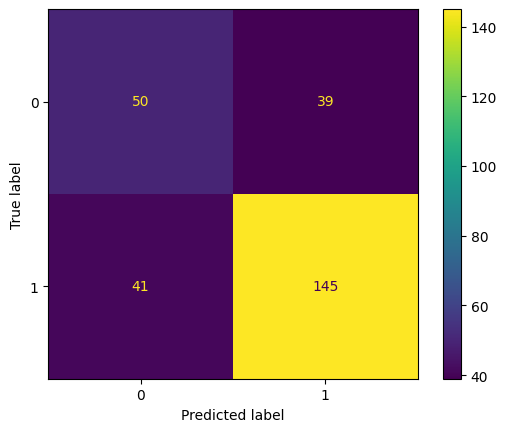

In [43]:
plot_confusion_matrix(clf,X_test,y_test)